<a href="https://colab.research.google.com/github/SujitbMusale/Supervised-ML-Regression--Seoul-Bike-Sharing-Demand-Prediction/blob/main/Copy_of_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

#Read Required Libararies for project.





In [251]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [252]:
# Read CSV file.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Read CSV File required for Project.

In [253]:
Bike_data= pd.read_csv('/content/drive/MyDrive/almabetter/csv files/SeoulBikeData.csv',encoding = 'ISO-8859-1')

# Data cleaning

In [254]:
Bike_data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [255]:
Bike_data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [256]:
Bike_data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [257]:
# To check null values in Rows.
Bike_data.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [258]:
# to check the info for type of variable present inside data
Bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [259]:
# To check for duplicate present in data set
len(Bike_data[Bike_data.duplicated()])

0

To chcek the shape of data

In [260]:
# to check the distribution of Dependent variable 
print(f' The shape of dataset is {(Bike_data.shape)} \n Total Rows are : {(Bike_data.shape)[0]}\n Total Columns are : {(Bike_data.shape)[1]}')

 The shape of dataset is (8760, 14) 
 Total Rows are : 8760
 Total Columns are : 14


Some columns name are not in prpoer format which are required for variable so, convert them in to proper format.

In [261]:
Bike_data.rename(columns={'Rented Bike Count':'Rented_Bike_Count','Temperature(°C)':'Temperature',
                          'Humidity(%)':'Humidity','Wind speed (m/s)':'Wind_speed',
                       'Visibility (10m)':'Visibility','Dew point temperature(°C)':'Dew_point_temperature',
                        'Solar Radiation (MJ/m2)':'Solar_Radiation',
                        'Rainfall(mm)':'Rainfall','Snowfall (cm)':'Snowfall',
                        'Functioning Day':'Functioning_Day'},inplace=True)

In [262]:
Bike_data.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day'],
      dtype='object')

In [263]:
# lets check the date format present in the given data
type(Bike_data['Date'][0])

str

In [264]:
# lets convert the date format from str to date time format.
Bike_data['Date']=Bike_data['Date'].astype('datetime64[ns]')


In [265]:
# create the month variable for analysis purpose
Bike_data['Month']=Bike_data['Date'].dt.month


In [266]:
# adding new columns to data 1 is for weekend and 0 is for week days
Bike_data['Day']=Bike_data['Date'].dt.day_name() 
Bike_data['Weekdays_or_weekend']= Bike_data['Day'].apply(lambda x: 1 if x=='Saturday' or x=='Sunday' else 0)


In [267]:
# droping the date and day columns from data
Bike_data.drop(['Date',"Day"],axis=1 ,inplace=True)

#EDA

* Variable Decleration
  n_var = numerical variable,
  c_var = categorical variable

In [268]:
# lets create the list of numerical and catogarical columns
n_var=list(Bike_data.describe().columns.tolist())
c_var= list(set(Bike_data.columns.tolist())-set(n_var))
c_var.extend(['Month','Weekdays_or_weekend'])

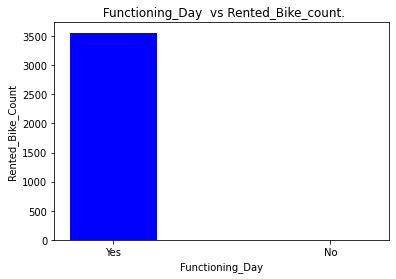

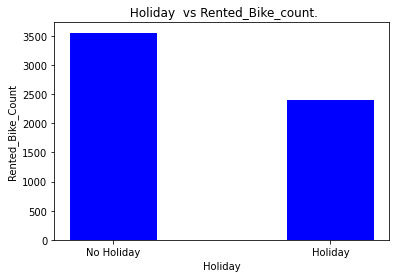

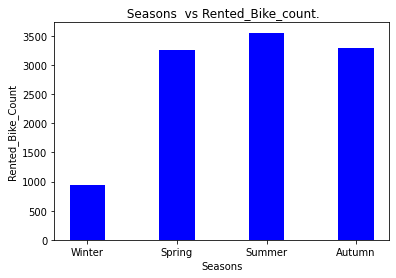

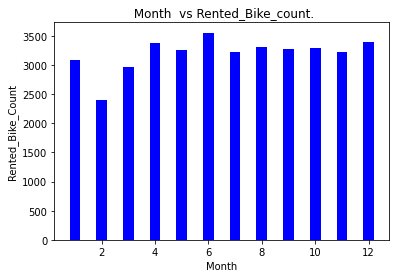

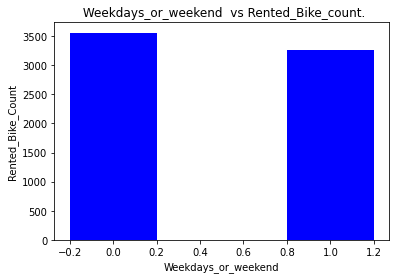

In [269]:

for var in c_var:
  plt.bar(Bike_data[var], Bike_data['Rented_Bike_Count'],color ='blue',width = 0.4)
  plt.xlabel(var)
  plt.ylabel("Rented_Bike_Count")
  plt.title(f" {var}  vs Rented_Bike_count.")
  #print(f" {var}  vs Rented_Bike_count.")
  plt.show()

some points are observed from above bar plot

1.   We can observe from Winter season is having low count of bike rent and summer season is having high count as compared to other so, we can say that people are like to take the bike on rent in summer season.
2.   totla Bike rented in weak days and in weakend are near about equals.
3.   total count of bike rented in No holidays days are greater than total count of bike rented in holideays.
4.   in feb the bike rent count is low while in jun and dec the count is high.



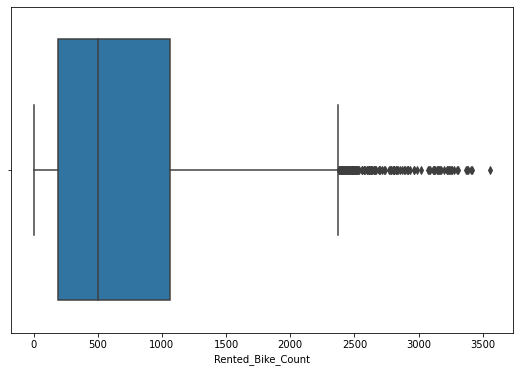

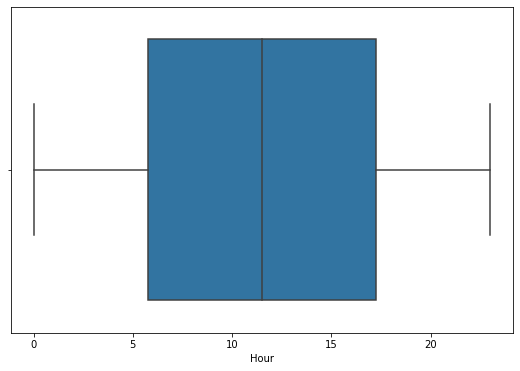

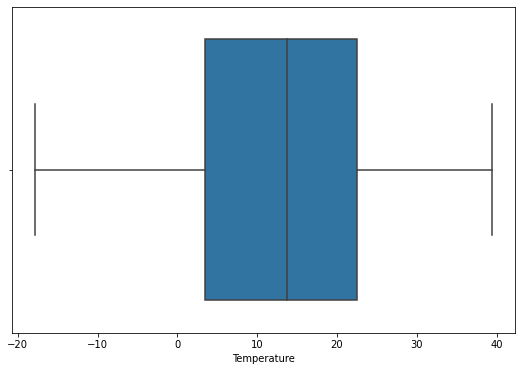

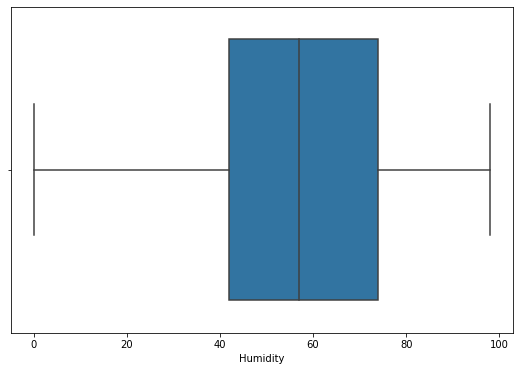

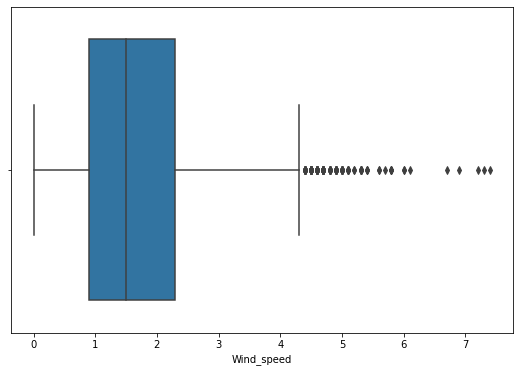

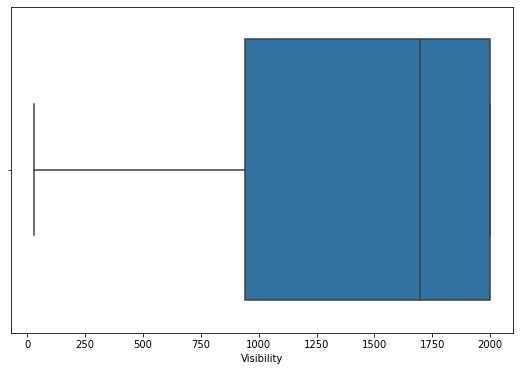

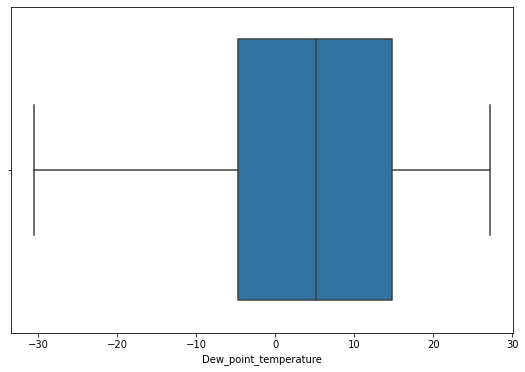

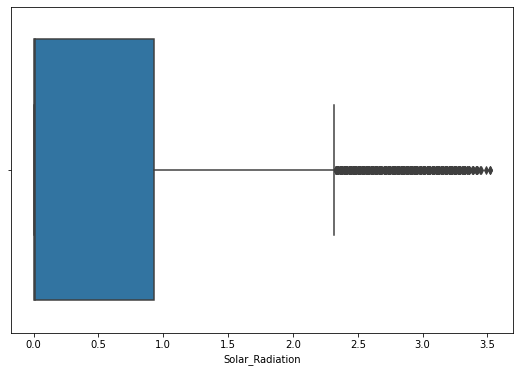

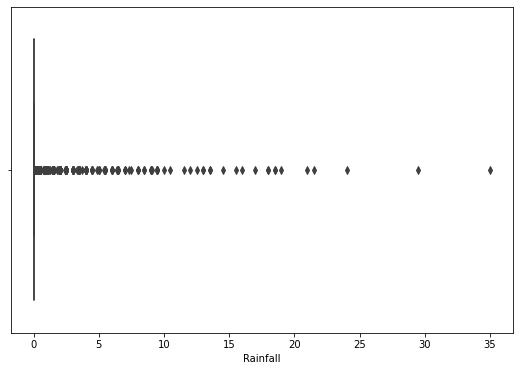

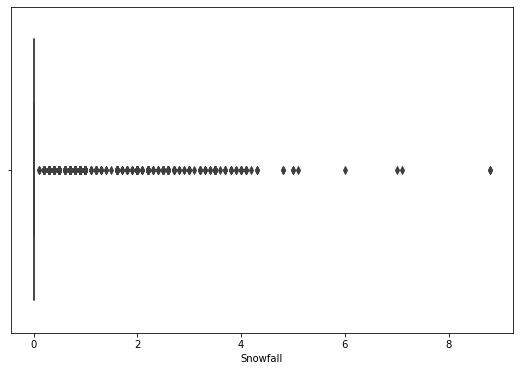

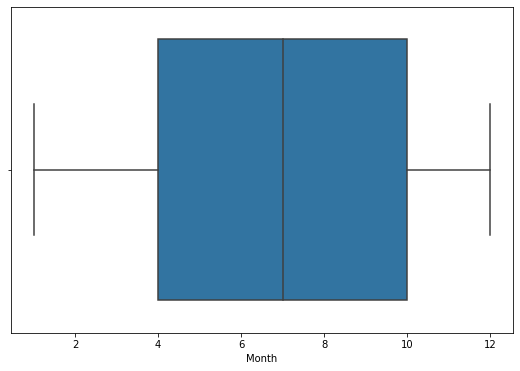

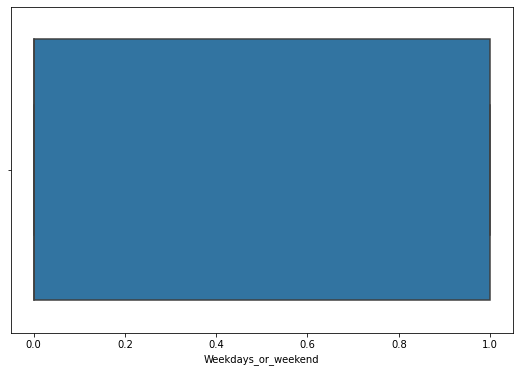

In [270]:
# lets plot the box plot to check the outliers avilable in numeric data.
for var in n_var:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()   
    sns.boxplot(x=Bike_data[var])

From above box plot we can see below listed observations.
1.   Snowfall is having some outliers.
2.   Rainfall also having some outliers.
3.   Solar_Radiation also having Some outliers.



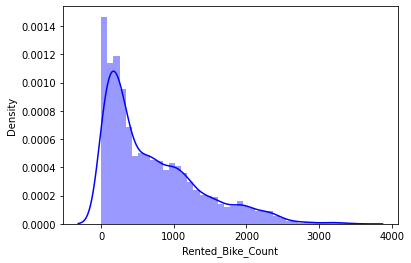

In [271]:
# lets chcek the distribution of target variables -'Bike_rent_count'.
sns.distplot(Bike_data['Rented_Bike_Count'],kde=True,color='blue')

Target variable is slightly right skewed

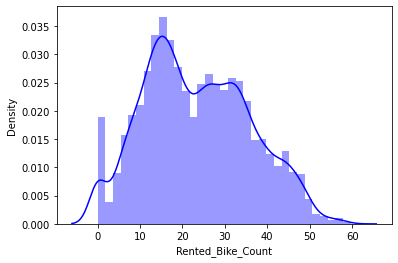

In [272]:
# to get normal distribution we have to do normalization and we will used squre root method
sns.distplot(np.sqrt(Bike_data['Rented_Bike_Count']),kde=True,color='blue')

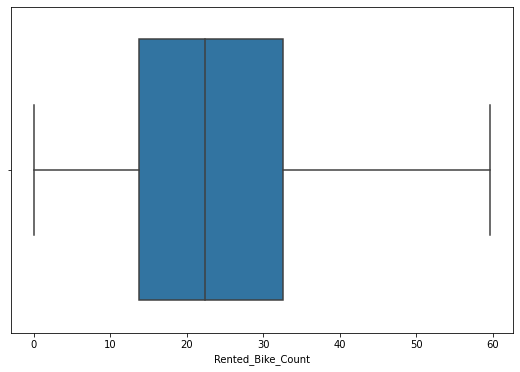

In [273]:
# also check for outliers by using box plot
plt.figure(figsize=(9, 6))
fig.gca()   
sns.boxplot(x=np.sqrt(Bike_data['Rented_Bike_Count']))

By observing above two graph we can say that now data is normalized, as ther is normal distribution in dist plot and no outliers in box plot.

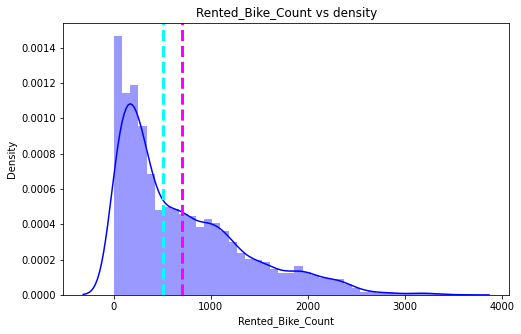

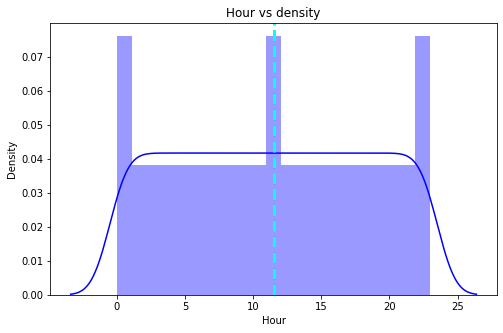

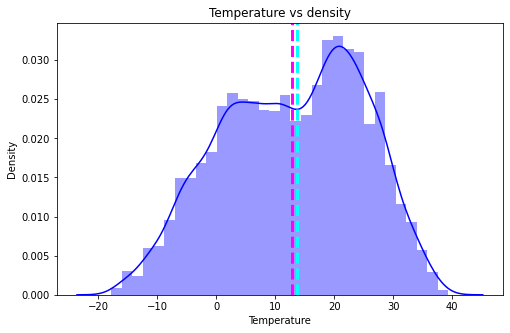

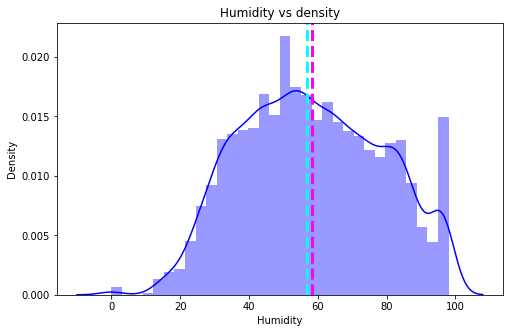

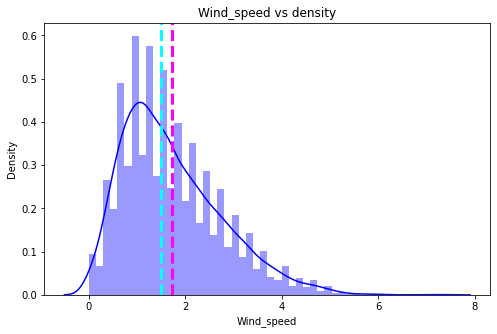

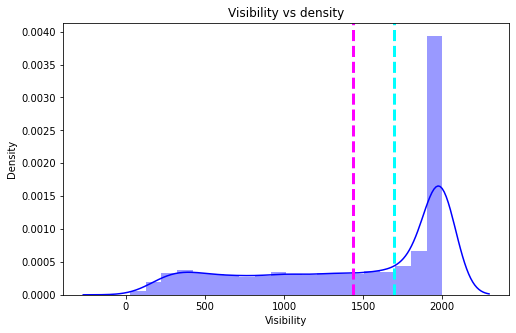

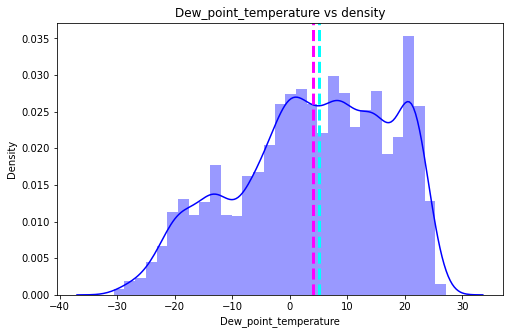

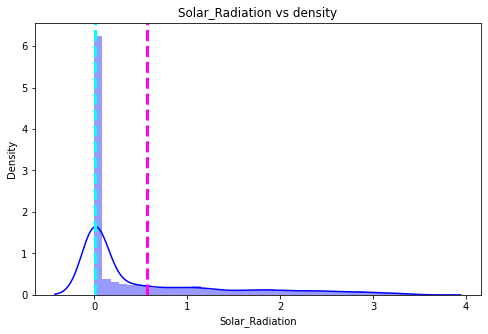

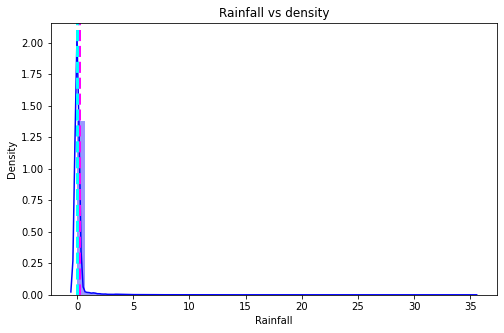

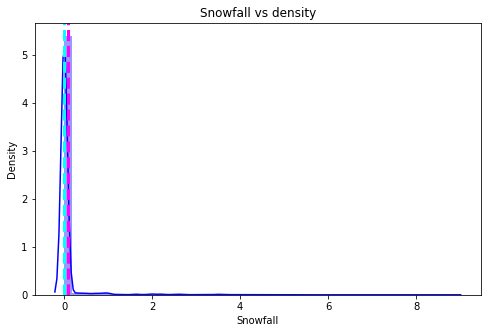

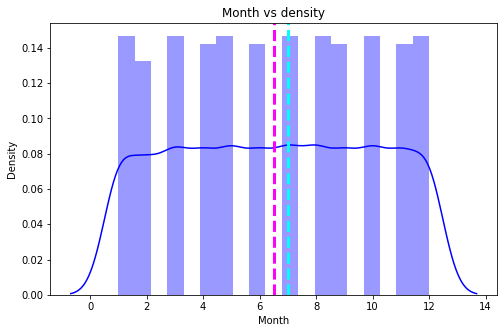

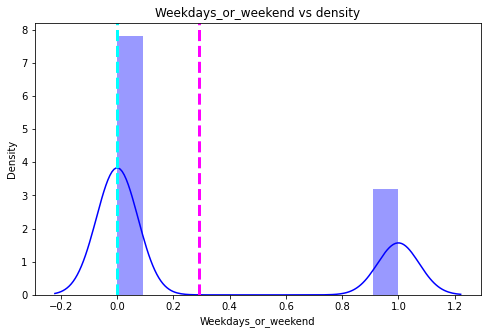

In [274]:
# lets check the distribution of independent variables.
for col in n_var:
    fig = plt.figure(figsize=(8,5))
    ax = fig.gca()
    sns.distplot(Bike_data[col],kde=True,color='blue')
    ax.axvline(Bike_data[col].mean(), color='magenta', linestyle='dashed', linewidth=3)
    ax.axvline(Bike_data[col].median(), color='cyan', linestyle='dashed', linewidth=3)    
    ax.set_title(f'{col} vs density')
plt.show()

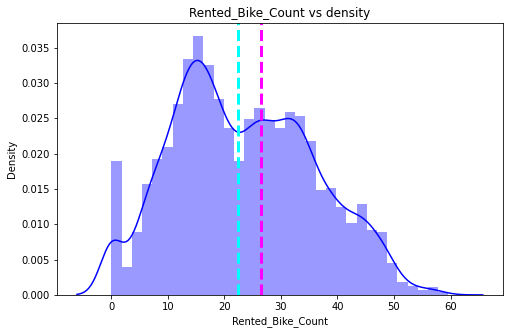

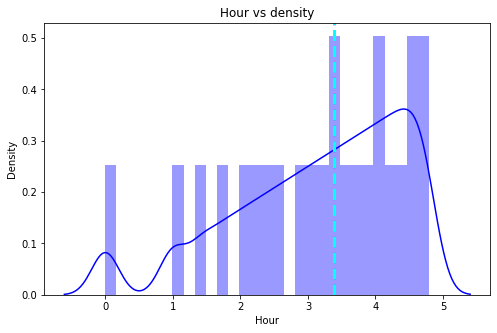

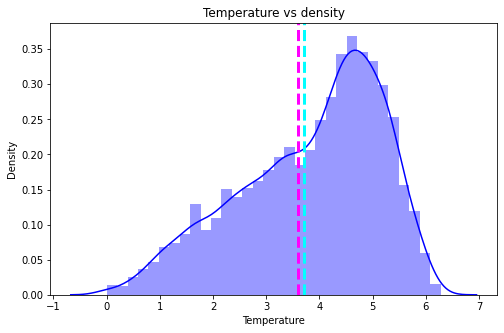

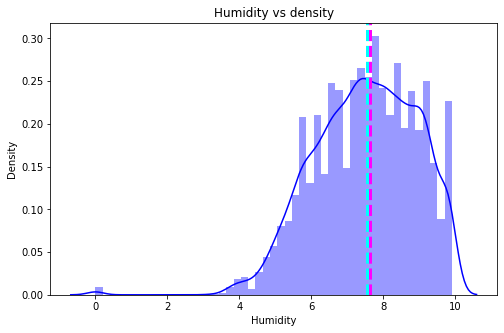

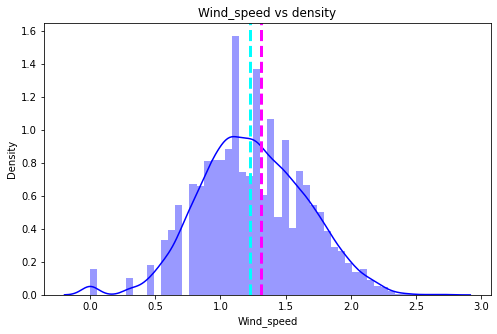

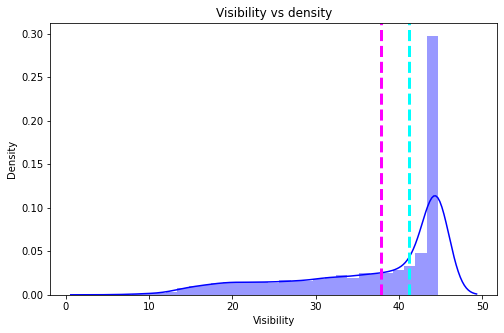

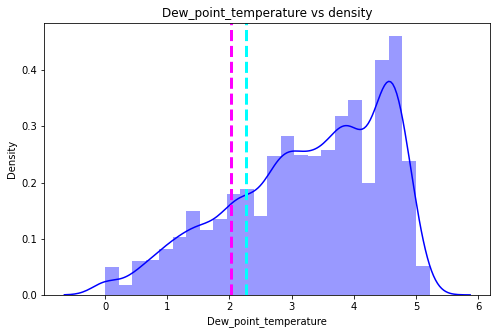

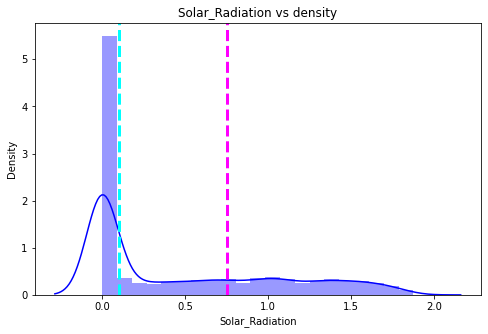

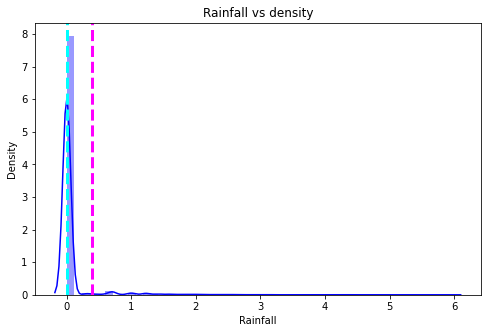

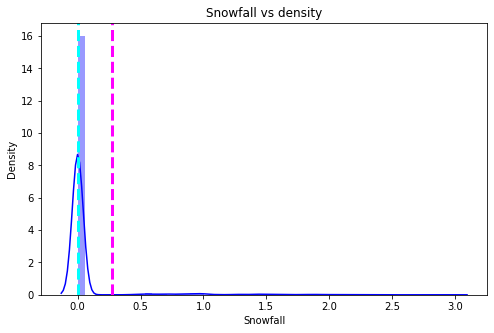

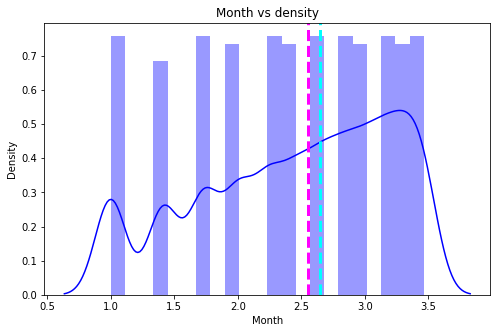

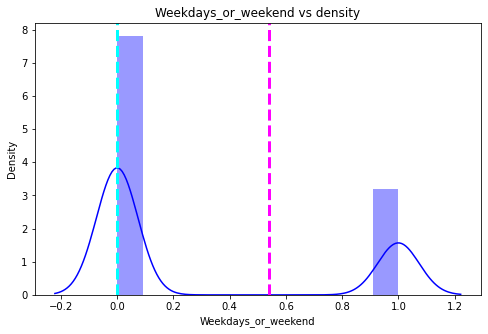

In [275]:
# normalizing the independent variable by using squre root method
for col in n_var:
    fig = plt.figure(figsize=(8,5))
    ax = fig.gca()
    sns.distplot(np.sqrt(Bike_data[col]),kde=True,color='blue')
    ax.axvline(np.sqrt(Bike_data[col].mean()), color='magenta', linestyle='dashed', linewidth=3)
    ax.axvline(np.sqrt(Bike_data[col].median()), color='cyan', linestyle='dashed', linewidth=3)    
    ax.set_title(f'{col} vs density')
plt.show()

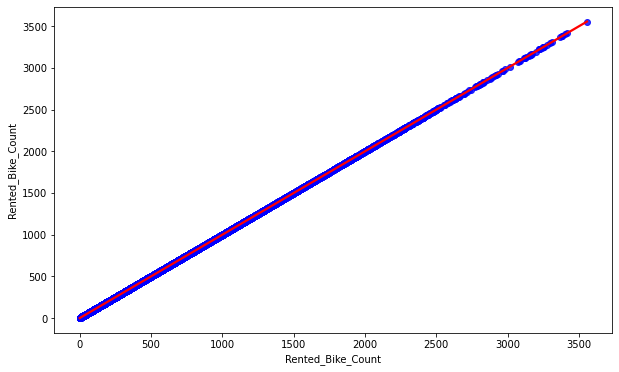

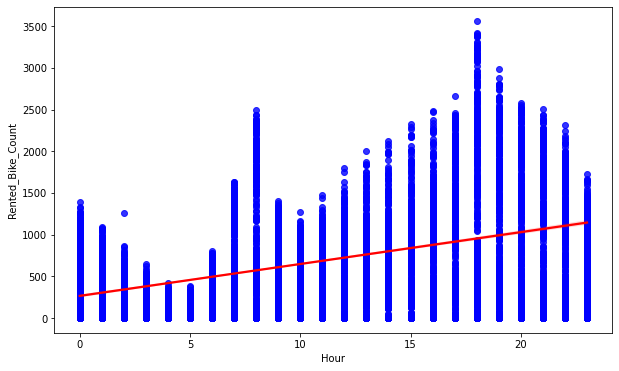

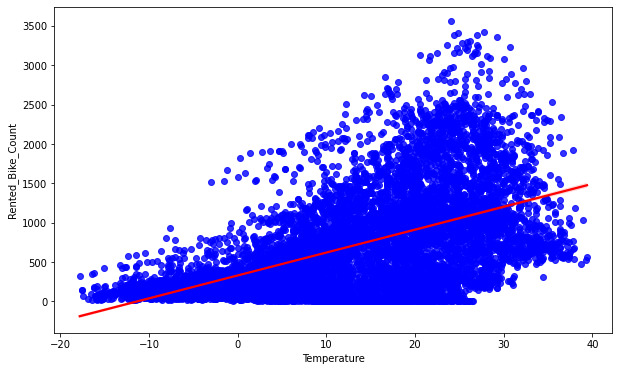

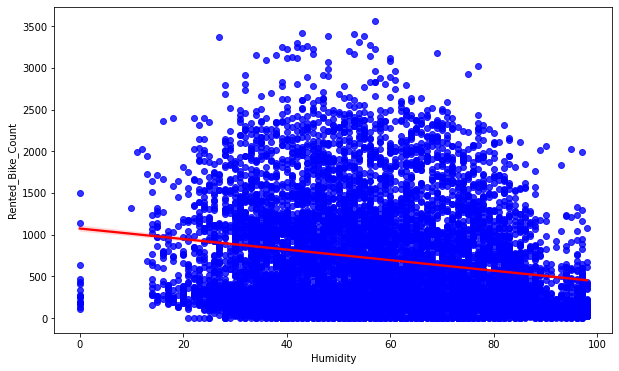

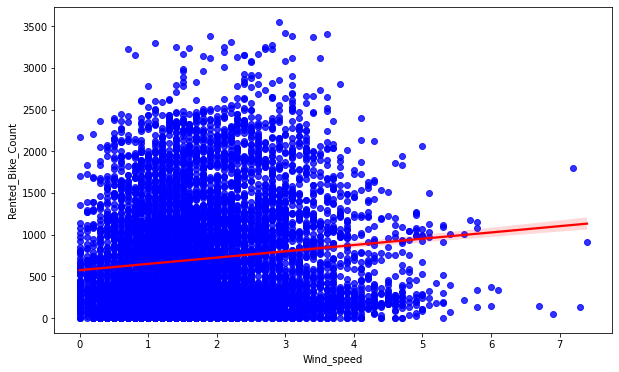

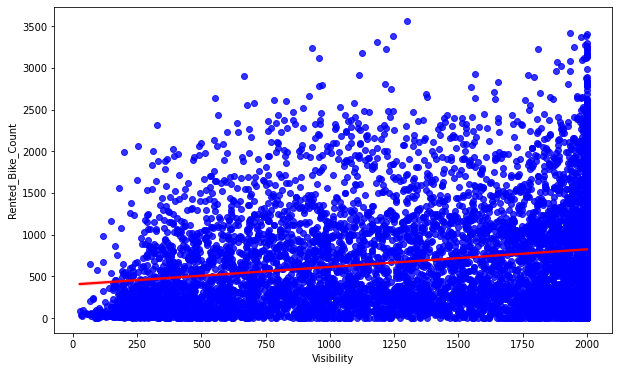

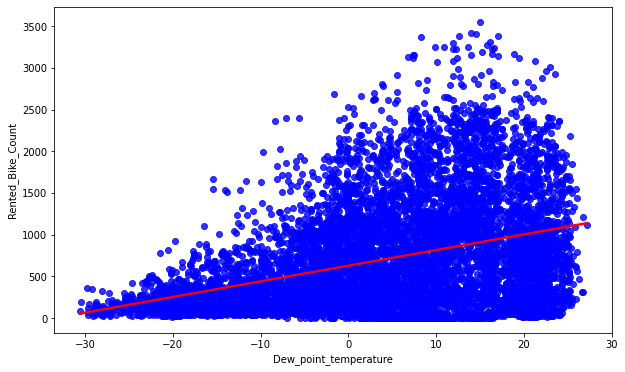

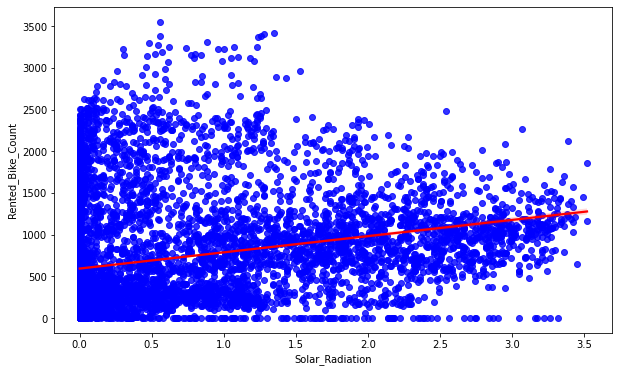

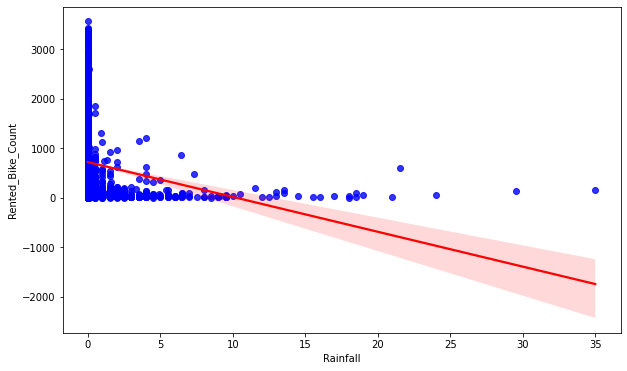

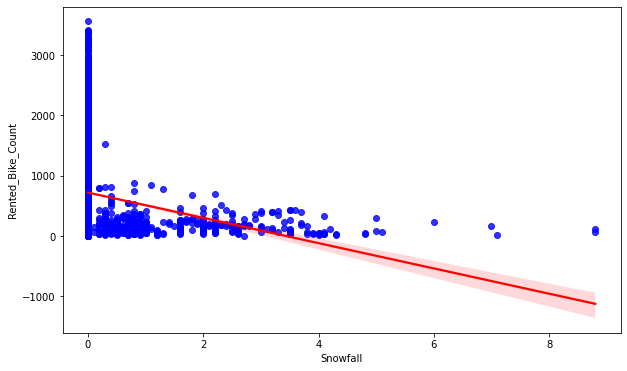

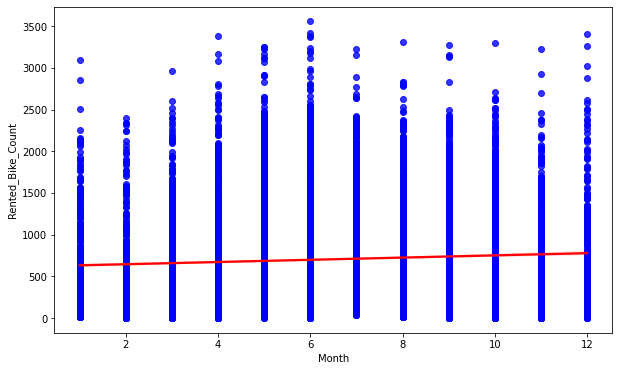

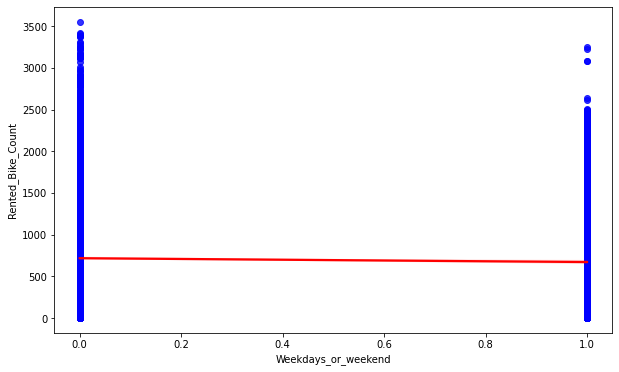

In [276]:
# lets check the relation between our dependent var and independent variable.
for var in n_var:
  plt.figure(figsize=(10,6))
  ax=fig.gca()
  sns.regplot(x=Bike_data[var],y=Bike_data['Rented_Bike_Count'],scatter_kws={'color':'blue'},line_kws={'color':'red'})
  ax.set_xlabel(var)
  ax.set_ylabel('Rented_Bike_Count')
  ax.set_title(f'{var} vs Rented_Bike_Count')

Below are the some points that are noticable from above Figures.
1.   We can see from "Hour" and "Rented_Bike_count" corelation there is sudden decrease in cout from 12 am to 5 am because this is night time and so people are not taking  use to travel in that time, also after 5 am its increase upto 8 am in morning as its office time as well as scool time so people are using bike. after that upto 10 am its decrease upto certain level and again increse upto evening as people are returning from office.
2.   From "Temperature" and "Rented__Bike_count" we can see that as temperature tends to "Zero" Bike count decrease and at normal temp people like to use a bike.
3.  "Humidity" Graph shows as Humidity increae bike count decrease.
4. "Wind_speed graph shows as wind spped increase  bike count increase but its ok up to 4m/s to 5m/s after that count reduce drastically.
5.   good "Visibility" gives directly proportional bike count.
6. "Due_point_temperature" increase bike count increase.
7. "Solar radiation" is having positive relation with bike count
8. " rainfall" and "snowfall" is having inverse relation with bike count, bease people dont use to travel in this wether conditions.



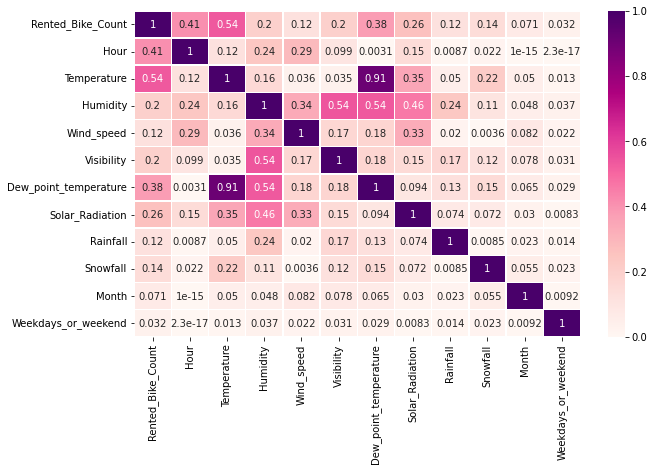

In [277]:
# lets check the correlation between variables by using heatmap.
plt.figure(figsize=(10,6))
sns.heatmap(data=abs(Bike_data.corr()),annot=True,cmap="RdPu",linewidth=.5)

As we can see that the  temperature and Dew_point_temperature are highly correlated variable so we will drop one of them  in modeling section.


#Modeling

In [278]:
Bike_data.drop('Dew_point_temperature',inplace=True,axis=1)

In [279]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [280]:
calc_vif(Bike_data[[i for i in Bike_data.describe().columns if i not in ['Rented_Bike_Count']]])

,variables,VIF
0,Hour,3.961874
1,Temperature,3.236809
2,Humidity,6.114153
3,Wind_speed,4.616621
4,Visibility,5.404128
5,Solar_Radiation,2.272068
6,Rainfall,1.081252
7,Snowfall,1.125304
8,Month,4.580307
9,Weekdays_or_weekend,1.399708


Here we can see that humidity columns is having VIF as 6.114153 and Visibility VIF as 5.404128 which is greater than 5 so, remove that column from data.

In [281]:
calc_vif(Bike_data[[i for i in Bike_data.describe().columns if i not in ['Rented_Bike_Count','Humidity','Visibility']]])

,variables,VIF
0,Hour,3.755736
1,Temperature,2.492225
2,Wind_speed,3.748534
3,Solar_Radiation,1.893823
4,Rainfall,1.030569
5,Snowfall,1.077566
6,Month,3.049391
7,Weekdays_or_weekend,1.350943


In [282]:
Bike_data.drop(['Humidity','Visibility'],inplace=True,axis=1)

In [283]:
# lets treate the categorical feature 
# holiday
Bike_data['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [284]:
#Functioning_Day
Bike_data['Functioning_Day'].value_counts()

Yes    8465
No      295
Name: Functioning_Day, dtype: int64

In [285]:
#Season
Bike_data['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

As above three variable are catogerical variable so replace with numerical variable so that we will be able to perform modeling by using them.

In [286]:
#Data encoding
#label encoding
encoders_nums = {"Holiday":{"No Holiday":0,"Holiday":1},"Functioning_Day":{"Yes":1,"No":0}}
Bike_data = Bike_data.replace(encoders_nums)

In [287]:
Bike_data=pd.get_dummies(Bike_data,columns=['Seasons'],prefix='Seasons',drop_first=True)

In [288]:
Bike_data.head()

,Rented_Bike_Count,Hour,Temperature,Wind_speed,Solar_Radiation,Rainfall,Snowfall,Holiday,Functioning_Day,Month,Weekdays_or_weekend,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,254,0,-5.2,2.2,0.0,0.0,0.0,0,1,1,0,0,0,1
1,204,1,-5.5,0.8,0.0,0.0,0.0,0,1,1,0,0,0,1
2,173,2,-6.0,1.0,0.0,0.0,0.0,0,1,1,0,0,0,1
3,107,3,-6.2,0.9,0.0,0.0,0.0,0,1,1,0,0,0,1
4,78,4,-6.0,2.3,0.0,0.0,0.0,0,1,1,0,0,0,1


In [289]:
Bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rented_Bike_Count    8760 non-null   int64  
 1   Hour                 8760 non-null   int64  
 2   Temperature          8760 non-null   float64
 3   Wind_speed           8760 non-null   float64
 4   Solar_Radiation      8760 non-null   float64
 5   Rainfall             8760 non-null   float64
 6   Snowfall             8760 non-null   float64
 7   Holiday              8760 non-null   int64  
 8   Functioning_Day      8760 non-null   int64  
 9   Month                8760 non-null   int64  
 10  Weekdays_or_weekend  8760 non-null   int64  
 11  Seasons_Spring       8760 non-null   uint8  
 12  Seasons_Summer       8760 non-null   uint8  
 13  Seasons_Winter       8760 non-null   uint8  
dtypes: float64(5), int64(6), uint8(3)
memory usage: 778.6 KB


#1.   Linear Regression




In [290]:
# let's import required library for Linear Regression.
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [305]:
# let's define X and y variable as independent and dependent variable respectively.
X=Bike_data.drop('Rented_Bike_Count',axis=1)
y=np.sqrt(Bike_data['Rented_Bike_Count']) 

In [306]:
# split data in to train and test split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [307]:

# Here if you don't apply scaling still we will get almost similar results.
# for its a good practice to apply scaling to the linear regression models.
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

In [308]:
# lets take regressor as liner regression
reg=LinearRegression()
# fitting the model to trainig
reg.fit(X_train,y_train)

LinearRegression()

In [309]:
# check coefficent of liner regression
pd.DataFrame(reg.coef_,X.columns, columns=['Coefficient'])

,Coefficient
Hour,13.034125
Temperature,24.395632
Wind_speed,3.358253
Solar_Radiation,3.435103
Rainfall,-71.139711
Snowfall,-10.476341
Holiday,-3.005512
Functioning_Day,28.479819
Month,1.055219
Weekdays_or_weekend,-0.589300


In [310]:
#lets Check score
reg.score(X_train,y_train)

0.6123528085603556

In [311]:
# Y peredictions on train data
y_pred_train=reg.predict(X_train)

# y predictions on test data
y_pred=reg.predict(X_test)

In [312]:
# Evaluation of training data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

The Mean Absolute Error (MAE) is 5.8555397241788345.
The Mean Squred Error(MSE) is 60.29949292444555.
The Root Mean Squared Error(RMSE) is 7.765274813195316.
The R2 Score is 0.6123528085603556.


In [313]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

 The Mean Absolute Error (MAE) is 5.834169822951748.
 The Mean Squred Error(MSE) is 58.624247223024895.
The Root Mean Squared Error(RMSE) is 7.656647257319936.
The R2 Score is 0.618326967365199.


From above both result having value near about similar  so we can say that model is performing good but as R2 score is low about 61.83% so there is need of madel improvement.

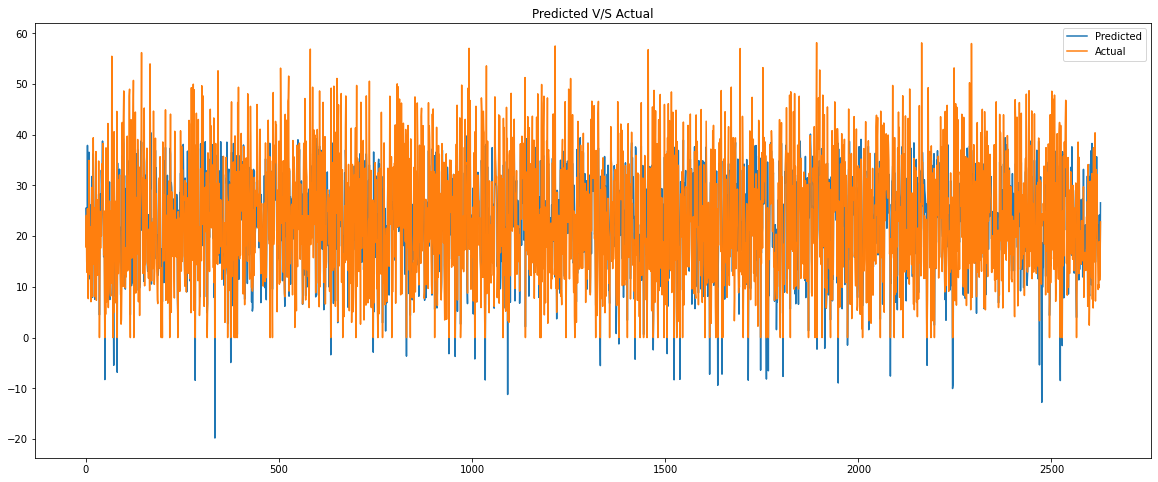

In [316]:
# plot to check the  predicted y values and actual y values
plt.figure(figsize=(20,8))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"],)
plt.title("Predicted V/S Actual")
plt.show()